# Modulos

In [2]:
from skimage import io
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
from skimage.color import (separate_stains, combine_stains,
                            hdx_from_rgb, rgb_from_hdx,rgb2hed, hed2rgb) 

from skimage import img_as_ubyte

# Directorios

In [3]:
# Constantes
data_source = "../data/"
models_dir = '../saved_models/'

In [4]:
train_imgs = glob(f"{data_source}training/*.png")
test_imgs = glob(f"{data_source}test/*.png")

In [5]:
n=800
len(train_imgs)
print(train_imgs[n])

../data/training\CaseNo_29-TissueId_13-Score_0-row_32384-col_6528.png


# Lectura de imagen

In [6]:
test_img  = io.imread(train_imgs[n])

In [7]:
test_img.shape

(300, 300, 3)

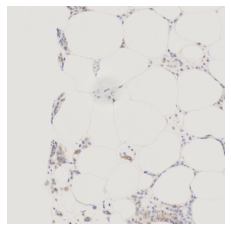

In [8]:
plt.figure()
plt.imshow(test_img)
plt.axis("off")
plt.show()


# Color deconvolution 

In [19]:
# https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html
ihc_hdx = rgb2hed(test_img) #separate_stains(test_img, hdx_from_rgb)
#ihc_rgb = combine_stains(ihc_hdx, rgb_from_hdx)

In [20]:
# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hdx[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hdx[:, :, 0], null, null), axis=-1))
ihc_d = hed2rgb(np.stack((null, ihc_hdx[:, :, 1], null), axis=-1))
ihc_x = hed2rgb(np.stack((null, null, ihc_hdx[:, :, 2]), axis=-1))

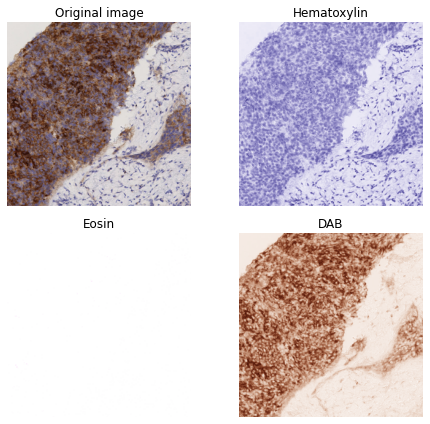

In [21]:
# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(test_img)
ax[0].set_title("Original image")

ax[1].imshow(img_as_ubyte(ihc_h))
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_d)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_x)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

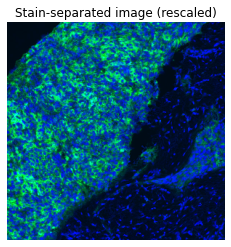

In [22]:
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h = rescale_intensity(ihc_hdx[:, :, 0], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hdx[:, :, 0], 99)))
d = rescale_intensity(ihc_hdx[:, :, 2], out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hdx[:, :, 2], 99)))

# Cast the two channels into an RGB image, as the blue and green channels
# respectively
zdh = np.dstack((null, d, h))

fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0])
axis.imshow(zdh)
axis.set_title('Stain-separated image (rescaled)')
axis.axis('off')
plt.show()

# Reescalamiento de imagen

In [23]:
v_min =ihc_hdx.min()
v_max = ihc_hdx.max()

In [30]:
X_std = (ihc_hdx - ihc_hdx.min()) / (ihc_hdx.max() - ihc_hdx.min())
X_scaled = X_std * (255 - 0) + 0
X_scaled = X_scaled.astype(int)


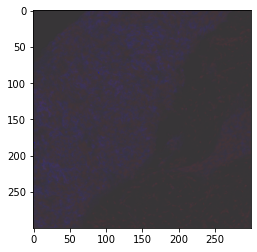

In [31]:
plt.figure()
plt.imshow(X_scaled, cmap="gray")
plt.show()